# Housing Price Prediction using Advanced Regression

### 1. Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the dataset
df = pd.read_csv("train.csv")

In [4]:
# Get the number of rows and columns
df.shape

(1460, 81)

In [5]:
# Get the column details to understand different features of the dataset
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# describe the dataframe
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Check the info of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [23]:
# Check missing values %
mis_val = df.isnull().sum()
mis_val_percent = (100 * df.isnull().sum() / len(df))
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
mis_val_table_ren_columns = mis_val_table.rename(
columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
mis_val_table_ren_columns['% of Total Values'] > 40.0

PoolQC           True
MiscFeature      True
Alley            True
Fence            True
FireplaceQu      True
LotFrontage     False
GarageType      False
GarageYrBlt     False
GarageFinish    False
GarageQual      False
GarageCond      False
BsmtExposure    False
BsmtFinType2    False
BsmtFinType1    False
BsmtCond        False
BsmtQual        False
MasVnrArea      False
MasVnrType      False
Electrical      False
Name: % of Total Values, dtype: bool

In [24]:
# Drop columns having more null values
df = df.drop(['PoolQC','MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [27]:
# correlation matrix
cor = df.corr()
cor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


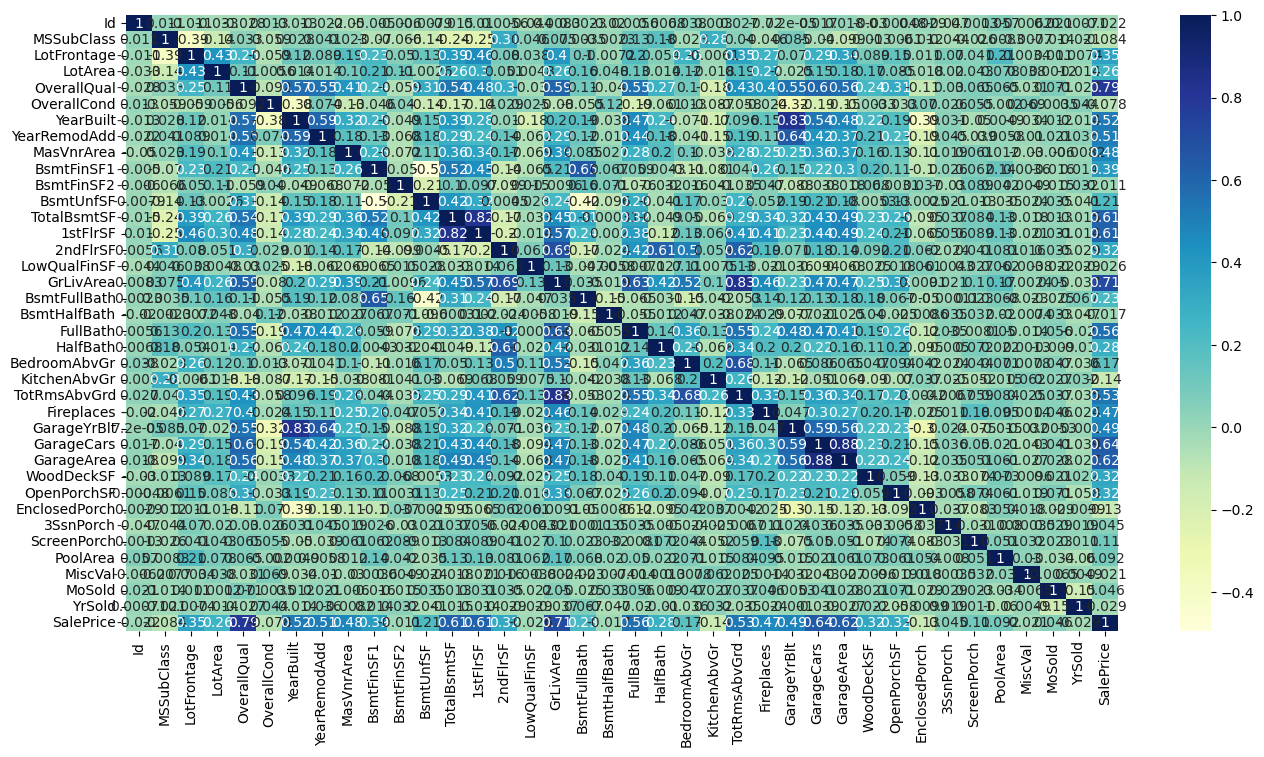

In [28]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

## 2. Model Building and Evaluation

In [33]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [35]:
X_train.shape

(1021, 75)

In [37]:
df_new.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [38]:
# Check the value counts on the season feature
df['MSZoning'].astype('category').value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [39]:
# Subset all categorical variables
df_categorical=df.select_dtypes(include=['object'])
df_categorical 

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [78]:
# Convert to Dummies
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [116]:
# Replace original categorical variables with dummy categorical variables mapped to the  data frame
df_new = df.drop(list(df_categorical.columns), axis=1)
df_new = pd.concat([df_new, df_dummies], axis=1)

In [117]:
df_new.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


In [118]:
df_new.isna().sum()

Id                         0
MSSubClass                 0
LotFrontage              259
LotArea                    0
OverallQual                0
                        ... 
SaleCondition_AdjLand      0
SaleCondition_Alloca       0
SaleCondition_Family       0
SaleCondition_Normal       0
SaleCondition_Partial      0
Length: 234, dtype: int64

In [119]:
df_new = df_new.dropna()
df_new.shape

(1121, 234)

In [120]:
# perform scaling using MinMaxScaler so the correlation coefficient are meaningful
from sklearn.preprocessing import MinMaxScaler

In [121]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size=0.7, test_size=0.3, random_state=100)
df_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
372,373,120,50.0,7175,6,5,1984,1984,0.0,623,...,0,0,0,0,1,0,0,0,1,0
814,815,50,45.0,8248,5,7,1918,1950,0.0,0,...,0,0,0,0,1,0,0,0,1,0
297,298,60,66.0,7399,7,5,1997,1998,1600.0,649,...,0,0,0,0,1,0,0,0,1,0
339,340,20,66.0,12400,6,7,1958,1998,176.0,585,...,0,0,0,0,1,0,0,0,1,0
527,528,60,67.0,14948,9,5,2008,2008,268.0,1330,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,1047,60,85.0,16056,9,5,2005,2006,208.0,240,...,0,0,1,0,0,0,0,0,0,1
65,66,60,76.0,9591,8,5,2004,2005,344.0,0,...,0,0,0,0,1,0,0,0,1,0
451,452,20,62.0,70761,7,5,1975,1975,0.0,655,...,0,0,0,0,1,0,0,0,1,0
98,99,30,85.0,10625,5,5,1920,1950,0.0,108,...,0,0,0,0,0,0,0,0,0,0


In [123]:
df_train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=234)

In [130]:
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
#var = ['temp', 'hum', 'windspeed','casual','registered','cnt']

df_train_scaled = scaler.fit_transform(df_train)
len(df_train_scaled)
df_train = pd.DataFrame(df_train_scaled, columns=df_train.columns)

In [132]:
df_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.254969,0.588235,0.099315,0.084580,0.500,0.428571,0.806202,0.566667,0.0000,0.110383,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.557916,0.176471,0.082192,0.100027,0.375,0.714286,0.294574,0.000000,0.0000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.203564,0.235294,0.154110,0.087805,0.625,0.428571,0.906977,0.800000,1.0000,0.114989,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.232351,0.000000,0.154110,0.159802,0.500,0.714286,0.604651,0.800000,0.1100,0.103650,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.361206,0.235294,0.157534,0.196484,0.875,0.428571,0.992248,0.966667,0.1675,0.235648,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [133]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [134]:
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.254969,0.588235,0.099315,0.084580,0.500,0.428571,0.806202,0.566667,0.0000,0.110383,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.557916,0.176471,0.082192,0.100027,0.375,0.714286,0.294574,0.000000,0.0000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.203564,0.235294,0.154110,0.087805,0.625,0.428571,0.906977,0.800000,1.0000,0.114989,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.232351,0.000000,0.154110,0.159802,0.500,0.714286,0.604651,0.800000,0.1100,0.103650,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.361206,0.235294,0.157534,0.196484,0.875,0.428571,0.992248,0.966667,0.1675,0.235648,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [135]:
df_new.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,...,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,726.842105,56.146298,70.665477,10122.956289,6.212310,5.561106,1972.264942,1985.683318,108.487957,438.399643,...,0.002676,0.003568,0.103479,0.000892,0.850134,0.000892,0.008029,0.016057,0.805531,0.106155
std,420.769012,41.772684,24.266812,8129.302641,1.380822,1.068236,30.967730,21.025974,189.500966,468.385038,...,0.051686,0.059655,0.304719,0.029867,0.357100,0.029867,0.089282,0.125751,0.395968,0.308174
min,1.000000,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,364.000000,20.000000,60.000000,7590.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,725.000000,50.000000,70.000000,9416.000000,6.000000,5.000000,1974.000000,1995.000000,0.000000,374.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1091.000000,70.000000,80.000000,11361.000000,7.000000,6.000000,2003.000000,2005.000000,170.000000,702.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [136]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 0 to 1459
Columns: 234 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(35), uint8(196)
memory usage: 556.1 KB


In [137]:
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.254969,0.588235,0.099315,0.084580,0.500,0.428571,0.806202,0.566667,0.0000,0.110383,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.557916,0.176471,0.082192,0.100027,0.375,0.714286,0.294574,0.000000,0.0000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.203564,0.235294,0.154110,0.087805,0.625,0.428571,0.906977,0.800000,1.0000,0.114989,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.232351,0.000000,0.154110,0.159802,0.500,0.714286,0.604651,0.800000,0.1100,0.103650,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.361206,0.235294,0.157534,0.196484,0.875,0.428571,0.992248,0.966667,0.1675,0.235648,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [138]:
### Model Building
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const                   -1.236295
Id                      -0.002804
MSSubClass              -0.001943
LotFrontage              0.017661
LotArea                  0.215898
                           ...   
SaleCondition_AdjLand    0.060650
SaleCondition_Alloca    -0.005266
SaleCondition_Family    -0.003725
SaleCondition_Normal     0.009651
SaleCondition_Partial   -0.012064
Length: 234, dtype: float64

In [139]:
# Instantiate Linear Regression
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [95]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[-1.09367599e+00 -6.50221792e+00  3.44156325e+01  1.76857958e+00
  5.91636419e+03  5.57625845e+03  3.45304107e+02  9.68654949e+01
  2.75324603e+01  1.41359703e+01  3.24411411e+00  2.02324207e+00
  1.94033460e+01  1.15194779e+01  2.22615421e+01  3.36964778e+00
  3.71508083e+01  2.35655544e+03 -2.44659115e+03  6.44271482e+03
  4.81585213e+03 -4.24581298e+03 -1.61935278e+04  1.11401042e+03
 -5.26706362e+02 -3.20380971e+01  5.65552903e+03  4.43736785e+00
  1.30735957e+01  2.52191224e+01  1.16096437e+00  6.15223350e+01
  1.91454100e+01  3.33613996e+01  1.00989865e+00  1.94767899e+02
 -2.80826134e+02  3.46851619e+04  2.52203309e+04  1.89243356e+04
  1.35149285e+04  7.79491333e+04 -7.25330530e+03 -1.03361445e+02
  1.46878966e+03 -5.46909837e+02 -2.95829178e+04 -2.67350646e+03
 -7.74161890e-09  1.35190283e+04 -5.79516100e+03 -7.62966587e+03
  6.64754491e+02  2.93254748e+03 -2.64865863e+04 -3.54896881e+03
  6.69473538e+03 -3.37822219e+01 -1.93375931e+04 -9.59796384e+03
  8.52522549e+03 -2.32095

In [140]:
# get the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     46.79
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          5.65e-267
Time:                        21:39:46   Log-Likelihood:                 1582.2
No. Observations:                 784   AIC:                            -2742.
Df Residuals:                     573   BIC:                            -1758.
Df Model:                         210                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.2363      0.115    -10.755      0.000      -1.462      -1.011
Id                       -0.0028      0.005     -0.518      0.604      -0.013       0.008
MSSubClass               -0.0019      0.043     -0.045      0.964      -0.086       0.083
LotFrontage               0.0177      0.033      0.530      0.597      -0.048       0.083
LotArea                   0.2159      0.033      6.510      0.000       0.151       0.281
OverallQual               0.0832      0.021      4.012      0.000       0.042       0.124
OverallCond               0.0686      0.016      4.281      0.000       0.037       0.100
YearBuilt                 0.0783      0.026      2.989      0.003       0.027       0.130
YearRemodAdd              0.0102      0.008      1.222      0.222      -0.006       0.027
MasVnrArea                0.0774      0.021      3.625      0.000       0.035       0.119
BsmtFinSF1                0.1746      0.034      5.093      0.000       0.107       0.242
BsmtFinSF2                0.0133      0.022      0.611      0.541      -0.029       0.056
BsmtUnfSF                 0.0208      0.015      1.402      0.162      -0.008       0.050
TotalBsmtSF               0.1711      0.034      5.013      0.000       0.104       0.238
1stFlrSF                  0.1971      0.035      5.576      0.000       0.128       0.267
2ndFlrSF                  0.1186      0.024      4.885      0.000       0.071       0.166
LowQualFinSF              0.0154      0.027      0.562      0.574      -0.038       0.069
GrLivArea                 0.2040      0.028      7.245      0.000       0.149       0.259
BsmtFullBath              0.0083      0.009      0.874      0.383      -0.010       0.027
BsmtHalfBath             -0.0086      0.014     -0.608      0.543      -0.036       0.019
FullBath                  0.0340      0.017      2.010      0.045       0.001       0.067
HalfBath                  0.0169      0.011      1.604      0.109      -0.004       0.038
BedroomAbvGr             -0.0448      0.021     -2.138      0.033      -0.086      -0.004
KitchenAbvGr             -0.0285      0.019     -1.479      0.140      -0.066       0.009
TotRmsAbvGrd              0.0176      0.021      0.857      0.392      -0.023       0.058
Fireplaces               -0.0028      0.010     -0.279      0.781      -0.022       0.017
GarageYrBlt              -0.0062      0.017     -0.374      0.709      -0.039       0.026
GarageCars                0.0298      0.016      1.913      0.056      -0.001       0.060
GarageArea                0.0098      0.024      0.416      0.678      -0.037       0.056
WoodDeckSF                0.0197      0.012      1.576      0.115      -0.005       0.044
OpenPorchSF               0.0222      0.015      1.442      0.150      -0.008       0.053
EnclosedPorch          

In [141]:
# Now we have the R square and p values. We can proceed to reduce the features by using RFE method
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, n_features_to_select=15,step=1)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[False False False  True  True  True  True False False  True False False
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True False False  True  True  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True False False False False
 False False False False False False False False Fa

In [142]:
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,TotalBsmtSF,GrLivArea,Street_Pave,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,ExterQual_Gd,ExterQual_TA
0,1.0,0.084580,0.500,0.428571,0.806202,0.110383,0.121768,0.060338,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.100027,0.375,0.714286,0.294574,0.000000,0.112275,0.156034,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.087805,0.625,0.428571,0.906977,0.114989,0.159574,0.290546,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.159802,0.500,0.714286,0.604651,0.103650,0.198854,0.149308,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.196484,0.875,0.428571,0.992248,0.235648,0.237643,0.437164,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     351.4
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:41:51   Log-Likelihood:                 1254.4
No. Observations:                 784   AIC:                            -2477.
Df Residuals:                     768   BIC:                            -2402.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.5791      0.069  

In [145]:
# There is no major changes to R square and we can check VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [146]:
a=X_train_rfe1.drop('const',axis=1)

In [147]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Street_Pave,244.40
8,RoofMatl_CompShg,225.31
1,OverallQual,36.34
3,YearBuilt,24.74
14,ExterQual_TA,23.88
2,OverallCond,15.81
5,TotalBsmtSF,14.18
6,GrLivArea,11.32
13,ExterQual_Gd,10.75
0,LotArea,5.07


In [149]:
# Import RFE
from sklearn.feature_selection import RFE


(784, 233)

In [150]:
# RFE with 15 features
lm = LinearRegression()
rfe2 = RFE(lm, n_features_to_select=15,step=1)

# Fit with 13 features
rfe2.fit(X_train, y_train)

# Print the boolean results
print(rfe2.support_)           
print(rfe2.ranking_)  

[False False False  True  True  True  True False False  True False False
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True False False  True  True  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True False False False False
 False False False False False False False False Fa

In [151]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe2.support_]

# Subsetting training data for 7 selected columns
X_train_rfe2 = X_train[col1]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,TotalBsmtSF,GrLivArea,Street_Pave,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,ExterQual_Gd,ExterQual_TA
0,1.0,0.084580,0.500,0.428571,0.806202,0.110383,0.121768,0.060338,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.100027,0.375,0.714286,0.294574,0.000000,0.112275,0.156034,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.087805,0.625,0.428571,0.906977,0.114989,0.159574,0.290546,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.159802,0.500,0.714286,0.604651,0.103650,0.198854,0.149308,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.196484,0.875,0.428571,0.992248,0.235648,0.237643,0.437164,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
# Fitting the model with 7 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     351.4
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:44:28   Log-Likelihood:                 1254.4
No. Observations:                 784   AIC:                            -2477.
Df Residuals:                     768   BIC:                            -2402.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.5791      0.069  

In [153]:
# R square seems good
b=X_train_rfe2.drop('const',axis=1)

In [154]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Street_Pave,244.40
8,RoofMatl_CompShg,225.31
1,OverallQual,36.34
3,YearBuilt,24.74
14,ExterQual_TA,23.88
2,OverallCond,15.81
5,TotalBsmtSF,14.18
6,GrLivArea,11.32
13,ExterQual_Gd,10.75
0,LotArea,5.07


In [155]:
# drop the 'hum' column as it has highest VIF
X_train_rfe2.drop("Street_Pave",axis=1,inplace=True)
X_train_rfe2

,const,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,TotalBsmtSF,GrLivArea,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,ExterQual_Gd,ExterQual_TA
0,1.0,0.084580,0.500,0.428571,0.806202,0.110383,0.121768,0.060338,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.100027,0.375,0.714286,0.294574,0.000000,0.112275,0.156034,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.087805,0.625,0.428571,0.906977,0.114989,0.159574,0.290546,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.159802,0.500,0.714286,0.604651,0.103650,0.198854,0.149308,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.196484,0.875,0.428571,0.992248,0.235648,0.237643,0.437164,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,1.0,0.212436,0.875,0.428571,0.968992,0.042523,0.326023,0.466949,1.0,0.0,0.0,0.0,0.0,1.0,0.0
780,1.0,0.119362,0.750,0.428571,0.961240,0.000000,0.187070,0.391045,1.0,0.0,0.0,0.0,0.0,1.0,0.0
781,1.0,1.000000,0.625,0.428571,0.736434,0.116052,0.250900,0.210415,0.0,0.0,0.0,0.0,1.0,0.0,1.0
782,1.0,0.134248,0.375,0.428571,0.310078,0.019135,0.074959,0.076287,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [156]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Now that we have removed one variable, let's fit the model with 6 variables
lm3 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     367.2
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:45:35   Log-Likelihood:                 1245.4
No. Observations:                 784   AIC:                            -2461.
Df Residuals:                     769   BIC:                            -2391.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.4608      0.063  

In [157]:
# R square looks good
# Now again check VIF
c=X_train_rfe2.drop('const',axis=1)

In [158]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,RoofMatl_CompShg,95.40
1,OverallQual,35.92
3,YearBuilt,24.45
13,ExterQual_TA,21.48
2,OverallCond,15.49
5,TotalBsmtSF,13.97
6,GrLivArea,11.12
12,ExterQual_Gd,10.12
0,LotArea,5.05
4,BsmtFinSF1,2.92


In [159]:
# drop the 'RoofMatl_CompShg' column as it has highest VIF
X_train_rfe2.drop("RoofMatl_CompShg",axis=1,inplace=True)
X_train_rfe2

,const,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,TotalBsmtSF,GrLivArea,RoofMatl_Membran,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,ExterQual_Gd,ExterQual_TA
0,1.0,0.084580,0.500,0.428571,0.806202,0.110383,0.121768,0.060338,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.100027,0.375,0.714286,0.294574,0.000000,0.112275,0.156034,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.087805,0.625,0.428571,0.906977,0.114989,0.159574,0.290546,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.159802,0.500,0.714286,0.604651,0.103650,0.198854,0.149308,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.196484,0.875,0.428571,0.992248,0.235648,0.237643,0.437164,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,1.0,0.212436,0.875,0.428571,0.968992,0.042523,0.326023,0.466949,0.0,0.0,0.0,0.0,1.0,0.0
780,1.0,0.119362,0.750,0.428571,0.961240,0.000000,0.187070,0.391045,0.0,0.0,0.0,0.0,1.0,0.0
781,1.0,1.000000,0.625,0.428571,0.736434,0.116052,0.250900,0.210415,0.0,0.0,0.0,1.0,0.0,1.0
782,1.0,0.134248,0.375,0.428571,0.310078,0.019135,0.074959,0.076287,0.0,0.0,0.0,0.0,0.0,1.0


In [160]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Now that we have removed one variable, let's fit the model with 6 variables
lm3 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     212.8
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          1.96e-244
Time:                        21:47:34   Log-Likelihood:                 1043.6
No. Observations:                 784   AIC:                            -2059.
Df Residuals:                     770   BIC:                            -1994.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0854      0.024  

In [161]:
# R square looks good
# Now again check VIF
c=X_train_rfe2.drop('const',axis=1)

In [162]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,OverallQual,32.37
3,YearBuilt,19.55
5,TotalBsmtSF,13.83
2,OverallCond,12.45
6,GrLivArea,11.01
12,ExterQual_TA,9.21
11,ExterQual_Gd,7.26
0,LotArea,5.04
4,BsmtFinSF1,2.81
10,RoofMatl_WdShngl,1.15


In [163]:
# drop the 'OverallQual' column as it has highest VIF
X_train_rfe2.drop("OverallQual",axis=1,inplace=True)
X_train_rfe2

,const,LotArea,OverallCond,YearBuilt,BsmtFinSF1,TotalBsmtSF,GrLivArea,RoofMatl_Membran,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,ExterQual_Gd,ExterQual_TA
0,1.0,0.084580,0.428571,0.806202,0.110383,0.121768,0.060338,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.100027,0.714286,0.294574,0.000000,0.112275,0.156034,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.087805,0.428571,0.906977,0.114989,0.159574,0.290546,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.159802,0.714286,0.604651,0.103650,0.198854,0.149308,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.196484,0.428571,0.992248,0.235648,0.237643,0.437164,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,1.0,0.212436,0.428571,0.968992,0.042523,0.326023,0.466949,0.0,0.0,0.0,0.0,1.0,0.0
780,1.0,0.119362,0.428571,0.961240,0.000000,0.187070,0.391045,0.0,0.0,0.0,0.0,1.0,0.0
781,1.0,1.000000,0.428571,0.736434,0.116052,0.250900,0.210415,0.0,0.0,0.0,1.0,0.0,1.0
782,1.0,0.134248,0.428571,0.310078,0.019135,0.074959,0.076287,0.0,0.0,0.0,0.0,0.0,1.0


In [164]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Now that we have removed one variable, let's fit the model with 6 variables
lm3 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     189.9
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          9.92e-221
Time:                        21:49:04   Log-Likelihood:                 985.11
No. Observations:                 784   AIC:                            -1944.
Df Residuals:                     771   BIC:                            -1884.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0078      0.025  

In [165]:
# R square looks good
# Now again check VIF
c=X_train_rfe2.drop('const',axis=1)

In [166]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,YearBuilt,13.18
4,TotalBsmtSF,12.74
1,OverallCond,10.69
11,ExterQual_TA,8.84
5,GrLivArea,8.10
10,ExterQual_Gd,7.26
0,LotArea,5.02
3,BsmtFinSF1,2.75
9,RoofMatl_WdShngl,1.14
6,RoofMatl_Membran,1.05


In [167]:
# drop the 'YearBuilt' column as it has highest VIF
X_train_rfe2.drop("YearBuilt",axis=1,inplace=True)
X_train_rfe2

,const,LotArea,OverallCond,BsmtFinSF1,TotalBsmtSF,GrLivArea,RoofMatl_Membran,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,ExterQual_Gd,ExterQual_TA
0,1.0,0.084580,0.428571,0.110383,0.121768,0.060338,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.100027,0.714286,0.000000,0.112275,0.156034,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.087805,0.428571,0.114989,0.159574,0.290546,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.159802,0.714286,0.103650,0.198854,0.149308,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.196484,0.428571,0.235648,0.237643,0.437164,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
779,1.0,0.212436,0.428571,0.042523,0.326023,0.466949,0.0,0.0,0.0,0.0,1.0,0.0
780,1.0,0.119362,0.428571,0.000000,0.187070,0.391045,0.0,0.0,0.0,0.0,1.0,0.0
781,1.0,1.000000,0.428571,0.116052,0.250900,0.210415,0.0,0.0,0.0,1.0,0.0,1.0
782,1.0,0.134248,0.428571,0.019135,0.074959,0.076287,0.0,0.0,0.0,0.0,0.0,1.0


In [168]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Now that we have removed one variable, let's fit the model with 6 variables
lm3 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     168.5
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          1.09e-196
Time:                        21:51:29   Log-Likelihood:                 925.91
No. Observations:                 784   AIC:                            -1828.
Df Residuals:                     772   BIC:                            -1772.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1685      0.021  

In [169]:
# R square looks good
# Now again check VIF
c=X_train_rfe2.drop('const',axis=1)

In [170]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,TotalBsmtSF,10.93
1,OverallCond,10.68
4,GrLivArea,8.07
10,ExterQual_TA,7.25
0,LotArea,5.02
9,ExterQual_Gd,4.60
2,BsmtFinSF1,2.74
8,RoofMatl_WdShngl,1.13
5,RoofMatl_Membran,1.05
6,RoofMatl_Tar&Grv,1.02


In [171]:
# drop the 'TotalBsmtSF' column as it has highest VIF
X_train_rfe2.drop("TotalBsmtSF",axis=1,inplace=True)
X_train_rfe2

,const,LotArea,OverallCond,BsmtFinSF1,GrLivArea,RoofMatl_Membran,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,ExterQual_Gd,ExterQual_TA
0,1.0,0.084580,0.428571,0.110383,0.060338,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.100027,0.714286,0.000000,0.156034,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.087805,0.428571,0.114989,0.290546,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.159802,0.714286,0.103650,0.149308,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.196484,0.428571,0.235648,0.437164,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
779,1.0,0.212436,0.428571,0.042523,0.466949,0.0,0.0,0.0,0.0,1.0,0.0
780,1.0,0.119362,0.428571,0.000000,0.391045,0.0,0.0,0.0,0.0,1.0,0.0
781,1.0,1.000000,0.428571,0.116052,0.210415,0.0,0.0,0.0,1.0,0.0,1.0
782,1.0,0.134248,0.428571,0.019135,0.076287,0.0,0.0,0.0,0.0,0.0,1.0


In [172]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Now that we have removed one variable, let's fit the model with 6 variables
lm3 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     178.8
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          1.82e-193
Time:                        21:52:32   Log-Likelihood:                 915.66
No. Observations:                 784   AIC:                            -1809.
Df Residuals:                     773   BIC:                            -1758.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2094      0.019  

In [173]:
# R square looks good
# Now again check VIF
c=X_train_rfe2.drop('const',axis=1)

In [174]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
1,OverallCond,10.47
9,ExterQual_TA,7.06
3,GrLivArea,6.89
0,LotArea,4.88
8,ExterQual_Gd,4.18
2,BsmtFinSF1,2.13
7,RoofMatl_WdShngl,1.13
4,RoofMatl_Membran,1.05
5,RoofMatl_Tar&Grv,1.02
6,RoofMatl_WdShake,1.02


In [175]:
# drop the 'OverallCond' column as it has highest VIF
X_train_rfe2.drop("OverallCond",axis=1,inplace=True)
X_train_rfe2

,const,LotArea,BsmtFinSF1,GrLivArea,RoofMatl_Membran,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,ExterQual_Gd,ExterQual_TA
0,1.0,0.084580,0.110383,0.060338,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.100027,0.000000,0.156034,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.087805,0.114989,0.290546,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.159802,0.103650,0.149308,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.196484,0.235648,0.437164,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
779,1.0,0.212436,0.042523,0.466949,0.0,0.0,0.0,0.0,1.0,0.0
780,1.0,0.119362,0.000000,0.391045,0.0,0.0,0.0,0.0,1.0,0.0
781,1.0,1.000000,0.116052,0.210415,0.0,0.0,0.0,1.0,0.0,1.0
782,1.0,0.134248,0.019135,0.076287,0.0,0.0,0.0,0.0,0.0,1.0


In [176]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Now that we have removed one variable, let's fit the model with 6 variables
lm3 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     196.0
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          6.85e-193
Time:                        21:53:21   Log-Likelihood:                 911.59
No. Observations:                 784   AIC:                            -1803.
Df Residuals:                     774   BIC:                            -1757.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2342      0.017  

In [177]:
# R square looks good
# Now again check VIF
c=X_train_rfe2.drop('const',axis=1)

In [178]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,GrLivArea,6.59
0,LotArea,4.85
7,ExterQual_Gd,2.75
8,ExterQual_TA,2.70
1,BsmtFinSF1,2.12
6,RoofMatl_WdShngl,1.13
3,RoofMatl_Membran,1.05
4,RoofMatl_Tar&Grv,1.02
5,RoofMatl_WdShake,1.02


# 3. Lasso and Ridge Regression

In [247]:
from sklearn.linear_model import Lasso,Ridge
#X_train = X_train_rfe2
X_train = df_train
lasso1 = Lasso()
lasso1.fit(X_train, y_train)

ridge1 = Ridge()
ridge1.fit(X_train, y_train)

Ridge()

In [248]:
def get_error_stats(y,y_pred,name="Test",DoPrint=True):
    MSE = mean_squared_error(y, y_pred)
    MAE = mean_absolute_error(y, y_pred)
    R2 = r2_score(y, y_pred)
    if DoPrint:
        print(F"MSE {name} {MSE}")
        print(F"MAE Score {name} {MAE}")
        print(F"R2 Score {name} {R2} \n")
    return MSE,MAE,R2

In [249]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

print("Number of non-zero Coefficients {}".format(np.sum(lasso1.coef_!=0)))
y_pred_train = lasso1.predict(X_train)
get_error_stats(y_train,y_pred_train)

y_pred_test = lasso1.predict(X_test)
get_error_stats(y_test,y_pred_test)

Number of non-zero Coefficients 0
MSE Test 0.018766119317343854
MAE Score Test 0.10129409699000408
R2 Score Test 0.0 

MSE Test 45352670862.42712
MAE Score Test 191423.65519614494
R2 Score Test -4.207171854008809 



(45352670862.42712, 191423.65519614494, -4.207171854008809)

In [250]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

print("Number of non-zero Coefficients {}".format(np.sum(lasso1.coef_!=0)))
y_pred_train = ridge1.predict(X_train)
get_error_stats(y_train,y_pred_train)

y_pred_test = ridge1.predict(X_test)
get_error_stats(y_test,y_pred_test)

Number of non-zero Coefficients 0
MSE Test 0.001520101962077683
MAE Score Test 0.025421421238010364
R2 Score Test 0.9189975329277168 

MSE Test 44864376717.46293
MAE Score Test 190300.57302098436
R2 Score Test -4.151108308471489 



(44864376717.46293, 190300.57302098436, -4.151108308471489)

In [251]:
MSE_train = []
MSE_test = []
coefs = []
n_alphas = 500
alphas = np.logspace(-10,6,n_alphas)

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train,y_train)
    coefs.append(ridge.coef_)

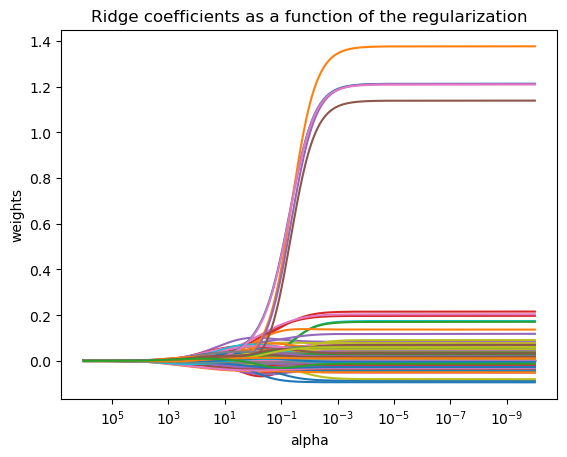

In [252]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [253]:
MSE_train = []
MSE_test = []
coefs = []
n_alphas = 500
alphas = np.logspace(-5,2,n_alphas)

for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train,y_train)
    coefs.append(lasso.coef_)

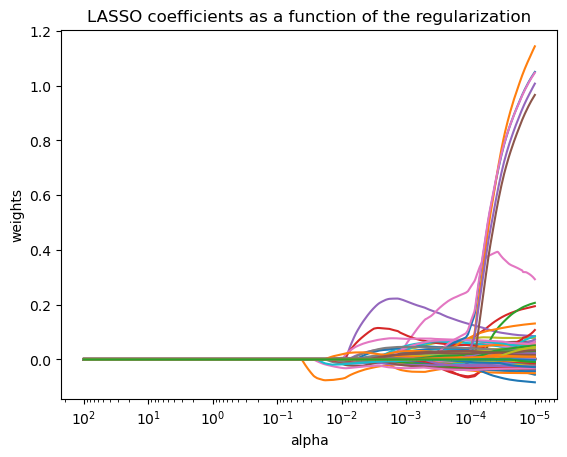

In [254]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('LASSO coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [255]:
MSE_train_Ridge=[]
MSE_test_Ridge=[]
MSE_train_Lasso=[]
MSE_test_Lasso=[]

n_alphas = 100
alphas = np.logspace(-1, 2, n_alphas)
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    
    y_pred_train = ridge.predict(X_train)
    MSE_train_Ridge.append(r2_score(y_train,y_pred_train))
    y_pred_test = ridge.predict(X_test)
    MSE_test_Ridge.append(r2_score(y_test,y_pred_test))

<AxesSubplot:>

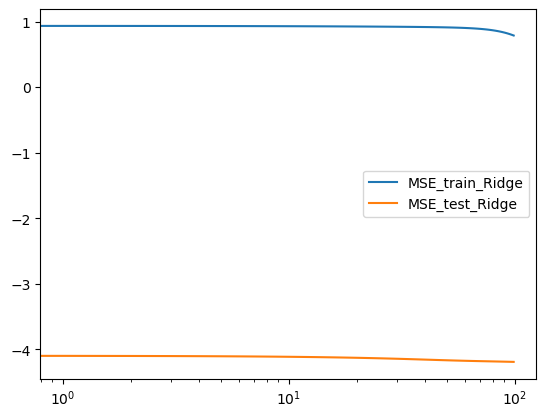

In [256]:
Results = pd.DataFrame({'MSE_train_Ridge':MSE_train_Ridge,"MSE_test_Ridge":MSE_test_Ridge})
Results.plot(legend=True,logx=True)

In [257]:
n_alphas = 100
alphas = np.logspace(-5, 5, n_alphas)
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    y_pred_train = lasso.predict(X_train)
    MSE_train_Lasso.append(mean_squared_error(y_train,y_pred_train))

    y_pred_test = lasso.predict(X_test)
    MSE_test_Lasso.append(mean_squared_error(y_test,y_pred_test))

<AxesSubplot:>

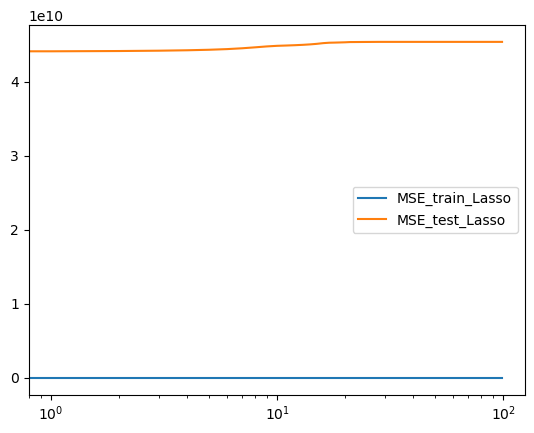

In [258]:
Results = pd.DataFrame({'MSE_train_Lasso':MSE_train_Lasso,"MSE_test_Lasso":MSE_test_Lasso})
Results.plot(legend=True,logx=True)

### 4. Compare Linear Regression, Ridge and Lasso

In [214]:
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os


In [208]:
X_train = df_train

In [209]:
# Instantiate
lm = LinearRegression()
# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [210]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-6686579716.263974
[-2.80952336e-03 -1.86827380e-03  1.76485340e-02  2.15902644e-01
  8.32160726e-02  6.86014205e-02  7.82120547e-02  1.02274721e-02
  7.74283119e-02  3.74283154e+10  7.47372633e+09  1.42776689e+10
 -4.05186051e+10 -2.18280906e+10 -9.32850697e+09 -2.46810333e+09
  2.67027229e+10  8.26667096e-03 -8.60596304e-03  3.39863973e-02
  1.69497392e-02 -4.47454242e-02 -2.84665920e-02  1.76431253e-02
 -2.76569491e-03 -6.20172603e-03  2.98125521e-02  9.83323796e-03
  1.97210318e-02  2.22818463e-02  7.79586760e-04  5.49145888e-02
  1.48094884e-02  3.80128914e-02  4.43237559e-03  3.76779764e-03
 -1.97497801e-03  6.09854540e-02  4.43473004e-02  3.32912935e-02
  2.37683863e-02  1.37028703e-01 -1.27568093e-02 -1.62976396e-04
  2.58949688e-03 -9.63998205e-04 -5.19781873e-02 -4.70925601e-03
 -9.50880686e+08  2.37515719e-02 -1.01848631e-02 -1.34250180e-02
  1.16745443e-03  5.15816944e-03 -4.65904104e-02 -6.25681637e-03
  1.17481790e-02 -3.20836050e-05 -3.39677644e-02 -1.68496073e-02
  1.49

In [211]:
from sklearn.metrics import r2_score, mean_squared_error

In [212]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9448942429544535
-2.53378738438433e+16
0.8107510300428016
7.4370555850443255e+28
0.0010341212117892878
2.2068414198944587e+26


## Ridge Regression

In [215]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [216]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 5.0}


In [217]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.23680554e-02 -2.71931533e-02 -2.91001932e-03  2.84354355e-02
  7.44839793e-02  3.13315839e-02  2.99633385e-03  2.05516936e-02
  4.41831287e-02  1.20346512e-02  3.35799611e-03  2.74697879e-02
  2.14157915e-02  3.87247391e-02  4.72142172e-02 -3.06429678e-03
  4.78663644e-02  2.48796329e-02 -9.78026959e-03  4.83099101e-02
  2.72009780e-02  9.27719972e-03 -2.13790711e-02  5.75947002e-02
  3.00137592e-02 -6.66907890e-03  5.49678315e-02  2.44592250e-02
  2.90409833e-02  1.29711898e-02 -1.10080835e-03  1.52075169e-02
  1.21164008e-02 -2.13923305e-02 -4.94643899e-03  1.03497718e-02
 -2.70159177e-03  1.24125187e-02  4.27789314e-03  1.16041258e-02
 -2.56027472e-03  2.19201989e-02  5.04351837e-03 -2.49645623e-02
 -8.43921998e-03  1.37363172e-02  8.41735625e-04  8.92732378e-03
  0.00000000e+00  3.42138607e-02 -1.12260376e-02 -6.13863358e-03
 -7.78520128e-04  9.62267468e-03 -5.49055434e-03 -1.03635740e-03
  5.67056014e-03  4.75209147e-03 -1.16731827e-03 -1.23930489e-02
  2.94188510e-02 -3.22274

In [218]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8948651132184466
-4.1813978849402975
1.5468114825303254
15208199518246.21
0.001972973829758068
45128188481.442764


## Lasso

In [219]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [220]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [221]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [222]:
lasso.coef_

array([-0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,
        0.,  0., -0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0., -0.,  0., -0.,
        0., -0.,  0.,  0.,  0., -0.,  0.,  0., -0.,  0.,  0., -0.,  0.,
       -0.,  0., -0., -0., -0., -0.,  0.,  0.,  0., -0.,  0., -0., -0.,
       -0., -0., -0.,  0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0.,
        0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0.,  0.,  0.,
        0.,  0., -0., -0., -0., -0.,  0., -0., -0.,  0., -0.,  0., -0.,
       -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -0., -0.,  0.,  0., -0.,  0., -0., -0.,  0., -0.,  0., -0.,
       -0.,  0., -0., -0.,  0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,
        0., -0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0.,  0.,
       -0.,  0., -0., -0., -0., -0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,
       -0., -0.,  0., -0., -0., -0., -0.,  0., -0., -0.,  0.,  0

In [223]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.0
-4.207171854008809
14.712637544797582
15283850080637.938
0.018766119317343854
45352670862.42712


In [224]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.448942e-01,8.948651e-01,0.000000e+00
1,R2 Score (Test),-2.533787e+16,-4.181398e+00,-4.207172e+00
2,RSS (Train),8.107510e-01,1.546811e+00,1.471264e+01
3,RSS (Test),7.437056e+28,1.520820e+13,1.528385e+13
4,MSE (Train),3.215776e-02,4.441817e-02,1.369895e-01
5,MSE (Test),1.485544e+13,2.124340e+05,2.129617e+05


## Lets observe the changes in the coefficients after regularization

In [242]:
df_new1 = df_new.drop(['Id'],axis=1)

In [243]:
betas = pd.DataFrame(index=df_new1.columns)

In [244]:
betas.rows = df_new1.columns

In [245]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [246]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
MSSubClass,-2.809523e-03,-0.012368,-0.0
LotFrontage,-1.868274e-03,-0.027193,-0.0
LotArea,1.764853e-02,-0.002910,0.0
OverallQual,2.159026e-01,0.028435,0.0
OverallCond,8.321607e-02,0.074484,0.0
YearBuilt,6.860142e-02,0.031332,-0.0
YearRemodAdd,7.821205e-02,0.002996,0.0
MasVnrArea,1.022747e-02,0.020552,0.0
BsmtFinSF1,7.742831e-02,0.044183,0.0
BsmtFinSF2,3.742832e+10,0.012035,0.0
